# Ensemble Learning

## Initial Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Read the CSV and Perform Basic Data Cleaning

In [4]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,RENT,66000.0,Source Verified,Mar-2019,low_risk,n,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,N,N
1,25000.0,0.2000,929.09,MORTGAGE,105000.0,Verified,Mar-2019,low_risk,n,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,N,N
2,20000.0,0.2000,529.88,MORTGAGE,56000.0,Verified,Mar-2019,low_risk,n,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,N,N
3,10000.0,0.1640,353.55,RENT,92000.0,Verified,Mar-2019,low_risk,n,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,N,N
4,22000.0,0.1474,520.39,MORTGAGE,52000.0,Not Verified,Mar-2019,low_risk,n,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,N,N


In [5]:
# Import lable Encoder 
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder instance
le = LabelEncoder()

# Fitting and encoding the columns with the LabelEncoder
# Encoding home_ownership column
le.fit(df["home_ownership"])
df["home_ownership"] = le.transform(df["home_ownership"])

# Encoding verification_status column
le.fit(df["verification_status"])
df["verification_status"] = le.transform(df["verification_status"])

# Encoding loan_status column
le.fit(df["loan_status"])
df["loan_status"] = le.transform(df["loan_status"])

# Encoding pymnt_plan column
le.fit(df["pymnt_plan"])
df["pymnt_plan"] = le.transform(df["pymnt_plan"])

# Encoding initial_list_status column
le.fit(df["initial_list_status"])
df["initial_list_status"] = le.transform(df["initial_list_status"])

# Encoding application_type column
le.fit(df["application_type"])
df["application_type"] = le.transform(df["application_type"])

# Encoding hardship_flag column
le.fit(df["hardship_flag"])
df["hardship_flag"] = le.transform(df["hardship_flag"])

# Encoding debt_settlement_flag column
le.fit(df["debt_settlement_flag"])
df["debt_settlement_flag"] = le.transform(df["debt_settlement_flag"])

# Preview the DataFrame
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10500.0,0.1719,375.35,3,66000.0,1,Mar-2019,1,0,27.24,...,85.7,100.0,0.0,0.0,65687.0,38199.0,2000.0,61987.0,0,0
1,25000.0,0.2000,929.09,1,105000.0,2,Mar-2019,1,0,20.23,...,91.2,50.0,1.0,0.0,271427.0,60641.0,41200.0,49197.0,0,0
2,20000.0,0.2000,529.88,1,56000.0,2,Mar-2019,1,0,24.26,...,66.7,50.0,0.0,0.0,60644.0,45684.0,7500.0,43144.0,0,0
3,10000.0,0.1640,353.55,3,92000.0,2,Mar-2019,1,0,31.44,...,100.0,50.0,1.0,0.0,99506.0,68784.0,19700.0,76506.0,0,0
4,22000.0,0.1474,520.39,1,52000.0,0,Mar-2019,1,0,18.76,...,100.0,0.0,0.0,0.0,219750.0,25919.0,27600.0,20000.0,0,0


In [6]:
#Encode Date columnes
df["issue_d"] = pd.to_datetime(df["issue_d"])
df["next_pymnt_d"] = pd.to_datetime(df["next_pymnt_d"])

# Calculate Year and Month
df['issue_d_y'] = df['issue_d'].dt.strftime('%Y')
df['issue_d_m'] = df['issue_d'].dt.strftime('%m')

df['next_pymnt_d_y'] = df['next_pymnt_d'].dt.strftime('%Y')
df['next_pymnt_d_m'] = df['next_pymnt_d'].dt.strftime('%m')

#Drop date columnes
df=df.drop('issue_d', axis=1 )
df=df.drop('next_pymnt_d', axis=1 )

In [7]:
df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,issue_d_y,issue_d_m,next_pymnt_d_y,next_pymnt_d_m
0,10500.0,0.1719,375.35,3,66000.0,1,1,0,27.24,0.0,...,65687.0,38199.0,2000.0,61987.0,0,0,2019,03,2019,05
1,25000.0,0.2000,929.09,1,105000.0,2,1,0,20.23,0.0,...,271427.0,60641.0,41200.0,49197.0,0,0,2019,03,2019,05
2,20000.0,0.2000,529.88,1,56000.0,2,1,0,24.26,0.0,...,60644.0,45684.0,7500.0,43144.0,0,0,2019,03,2019,05
3,10000.0,0.1640,353.55,3,92000.0,2,1,0,31.44,0.0,...,99506.0,68784.0,19700.0,76506.0,0,0,2019,03,2019,05
4,22000.0,0.1474,520.39,1,52000.0,0,1,0,18.76,0.0,...,219750.0,25919.0,27600.0,20000.0,0,0,2019,03,2019,05


In [10]:
# Select X and Y Columnes
x_cols = [i for i in df.columns if i not in ('loan_status')]

In [11]:
# Show X columnes
x_cols

['loan_amnt',
 'int_rate',
 'installment',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 

## Split the Data into Training and Testing

In [12]:
# Create our features
X = df[x_cols]

# Create our target
y = df['loan_status']

In [13]:
X.describe()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
count,68817.000000,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.0,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.000000,68817.000000,68817.0,6.881700e+04,6.881700e+04,68817.000000,6.881700e+04,68817.0,68817.0
mean,16677.594562,0.127718,480.652863,1.812779,8.821371e+04,0.669994,0.0,21.778153,0.217766,0.497697,...,95.057627,30.626217,0.125972,0.0,2.100332e+05,6.133843e+04,29734.128558,5.572240e+04,0.0,0.0
std,10277.348590,0.048130,288.062432,0.941313,1.155800e+05,0.719105,0.0,20.199244,0.718367,0.758122,...,8.326426,33.631463,0.336732,0.0,1.928088e+05,5.738798e+04,26795.394232,5.095845e+04,0.0,0.0
min,1000.000000,0.060000,30.890000,0.000000,4.000000e+01,0.000000,0.0,0.000000,0.000000,0.000000,...,20.000000,0.000000,0.000000,0.0,3.600000e+03,2.350000e+02,100.000000,1.270000e+02,0.0,0.0
25%,9000.000000,0.088100,265.730000,1.000000,5.000000e+04,0.000000,0.0,13.890000,0.000000,0.000000,...,93.000000,0.000000,0.000000,0.0,6.697700e+04,2.650300e+04,11600.000000,2.288000e+04,0.0,0.0
50%,15000.000000,0.118000,404.560000,1.000000,7.300000e+04,1.000000,0.0,19.760000,0.000000,0.000000,...,100.000000,20.000000,0.000000,0.0,1.467100e+05,4.535700e+04,22100.000000,4.200000e+04,0.0,0.0
75%,24000.000000,0.155700,648.100000,3.000000,1.040000e+05,1.000000,0.0,26.660000,0.000000,1.000000,...,100.000000,50.000000,0.000000,0.0,3.036400e+05,7.657000e+04,39300.000000,7.249900e+04,0.0,0.0
max,40000.000000,0.308400,1676.230000,3.000000,8.797500e+06,2.000000,0.0,999.000000,18.000000,5.000000,...,100.000000,100.000000,4.000000,0.0,3.292782e+06,1.295455e+06,509400.000000,1.426964e+06,0.0,0.0


In [14]:
# Check the balance of our target values
Counter(y)

Counter({1: 68470, 0: 347})

In [15]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [16]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [18]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

Balanced Random Forest Classifier### Balanced Random Forest Classifier

In [19]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [59]:
# Calculated the balanced accuracy score
from imblearn.metrics import geometric_mean_score
y_pred_brf = brf.predict(X_test)
print(
f" Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_brf):.2f}\n "
f"Geometric mean {geometric_mean_score(y_test, y_pred_brf):.2f}"
)

 Balanced accuracy: 0.76
 Geometric mean 0.76


In [25]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_brf)

array([[   67,    34],
       [ 2345, 14759]], dtype=int64)

In [26]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.03      0.66      0.86      0.05      0.76      0.56       101
          1       1.00      0.86      0.66      0.93      0.76      0.58     17104

avg / total       0.99      0.86      0.66      0.92      0.76      0.58     17205



In [37]:
# List the features sorted in descending order by feature importance
importances = brf.feature_importances_
importances_sorted = sorted(zip(brf.feature_importances_, X.columns), reverse=True)
importances_sorted[:30]

[(0.07969381153514353, 'total_rec_prncp'),
 (0.06861884929315269, 'last_pymnt_amnt'),
 (0.056549257699796754, 'total_rec_int'),
 (0.05636068372670461, 'total_pymnt'),
 (0.054281767655376845, 'total_pymnt_inv'),
 (0.03603403521528017, 'int_rate'),
 (0.02966036998522546, 'issue_d_m'),
 (0.01802877144671627, 'dti'),
 (0.01718624071396095, 'mths_since_rcnt_il'),
 (0.017130370407662722, 'mths_since_recent_inq'),
 (0.016992466501743454, 'max_bal_bc'),
 (0.01693375221633928, 'installment'),
 (0.016858213539558697, 'out_prncp_inv'),
 (0.016052363065748317, 'total_il_high_credit_limit'),
 (0.015607555223351437, 'out_prncp'),
 (0.015497977456944758, 'tot_cur_bal'),
 (0.014686289418633949, 'mo_sin_old_il_acct'),
 (0.014676830379596375, 'avg_cur_bal'),
 (0.014624815484961468, 'il_util'),
 (0.014553882420304153, 'mo_sin_old_rev_tl_op'),
 (0.014343361977918417, 'annual_inc'),
 (0.01419434486046827, 'total_bal_ex_mort'),
 (0.013953636290461308, 'revol_bal'),
 (0.013573455136193326, 'tot_hi_cred_lim')

### Easy Ensemble Classifier

In [38]:
# Train the Classifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier

base_estimator = AdaBoostClassifier(n_estimators=100)
eec = EasyEnsembleClassifier(n_estimators=100, base_estimator=base_estimator)
eec.fit(X_train, y_train)

In [45]:
# Calculated the balanced accuracy score
y_pred_eec = eec.predict(X_test)
print(
f" Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_eec):.2f}\n "
f"Geometric mean {geometric_mean_score(y_test, y_pred_eec):.2f}"
)

Balanced accuracy: 0.94 


 Balanced accuracy: 0.94
 Geometric mean 0.94


In [46]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_eec)

array([[   95,     6],
       [  920, 16184]], dtype=int64)

In [48]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_eec))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.09      0.94      0.95      0.17      0.94      0.89       101
          1       1.00      0.95      0.94      0.97      0.94      0.89     17104

avg / total       0.99      0.95      0.94      0.97      0.94      0.89     17205



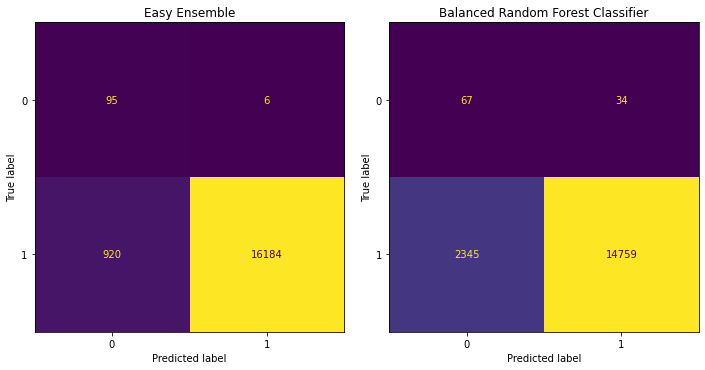

In [53]:
#plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

plot_confusion_matrix(brf, X_test, y_test, ax=axs[1], colorbar=False)
axs[1].set_title("Balanced Random Forest Classifier")

plot_confusion_matrix(eec, X_test, y_test, ax=axs[0], colorbar=False)
axs[0].set_title("Easy Ensemble")

fig.tight_layout()
plt.show()

### Final Questions

1. Which model had the best balanced accuracy score?

    Easy Ensemble 

2. Which model had the best recall score?

    Easy Ensemble

3. Which model had the best geometric mean score?

    Easy Ensemble

4. What are the top three features?

    (0.07969381153514353, 'total_rec_prncp')
    
    (0.06861884929315269, 'last_pymnt_amnt')
    
    (0.056549257699796754, 'total_rec_int')